# Import Library

Mengimport library yang dibutuhkan


In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

# Data Loading

Mengunduh data dari sumber https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip kemudian mengekstrak file dataset dan dijadikan dataframe. Data yang akan digunakan yaitu application_train.csv

In [2]:
!wget "https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip"

--2022-11-24 06:06:47--  https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip
Resolving rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)... 52.219.124.47
Connecting to rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)|52.219.124.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721616255 (688M) [application/zip]
Saving to: ‘home-credit-default-risk.zip’

home-credit-default 100%[===================>] 688.19M  13.9MB/s    in 51s     

2022-11-24 06:07:39 (13.5 MB/s) - ‘home-credit-default-risk.zip’ saved [721616255/721616255]



In [3]:
!unzip home-credit-default-risk.zip

Archive:  home-credit-default-risk.zip
  inflating: HomeCredit_columns_description.csv  
  inflating: POS_CASH_balance.csv    
  inflating: application_test.csv    
  inflating: application_train.csv   
  inflating: bureau.csv              
  inflating: bureau_balance.csv      
  inflating: credit_card_balance.csv  
  inflating: installments_payments.csv  
  inflating: previous_application.csv  
  inflating: sample_submission.csv   


In [4]:
df = pd.read_csv('/content/application_train.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Output kode diatas memberikan informasi sebagai berikut:

*   Terdapat 307511 baris dalam dataset 
*   Ada 122 Kolom dalam dataset



# Explanatory Data Analysis

Melakukan beberapa tahapan sebagai berikut : 

1.   Deskripsi Variabel
2.   Menangani missing value dan duplikat data
3.   Analisis Univariate : fitur kategorik dan numerik
4.   Analisis Multivariate : fitur kategorik dan numerik





<h2> Dekspripsi Variabel <h2>

In [5]:
# Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Dari output dapat dilihat bahwa:

*   Ada 16 kolom bertipe object
*   Terdapat 41 kolom dengan tipe data int64
*   Terdapat 65 kolom dengan tipe data float64



In [6]:
# Cek deskripsi data
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<h2> Menangani missing value <h2>

Melakukan pengecekan terlebih dahulu apakah didalam dataset terdapat missing value dengan kode berikut :

In [7]:
# Fungsi untuk mencari nilai yang kosong (missing value)
def missing_values(df):
    n_miss_val = df.isnull().sum()
    n_miss_per = 100 * df.isnull().sum() / len(df)
    miss_tbl = pd.concat([n_miss_val,n_miss_per],axis=1).sort_values(1,ascending=False).round(1)
    miss_tbl = miss_tbl[miss_tbl[1] !=0]
    
    miss_tbl = miss_tbl.rename(columns ={0: 'Missing Values',1:'%(Percentage) Missing Values'})
    print("{} columns that have missing values.".format(miss_tbl.shape[0]))
    
    return miss_tbl

In [8]:
# Cek missing value di data train
missing_values_table = missing_values(df)
missing_values_table

64 columns that have missing values.


,Missing Values,%(Percentage) Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
...,...,...
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2


Dapat dilihat bahwa ada 64 kolom yang memiliki missing value, langkah mengatasi missing value yaitu: 
* Drop kolom yang memiliki missing value lebih dari 25 %
* Mengganti missing value pada data numerik dengan nilai mean
* Mengganti missing calue pada data kategorik dengan nilai modus


In [9]:
# cek missing value dengan nilai lebih dari 25%
col_mv = missing_values_table[missing_values_table['%(Percentage) Missing Values'] > 25]
col_mv

,Missing Values,%(Percentage) Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


In [10]:
# Mengatasi missing value dengan drop kolom yang memiliki missing value lebih dari 25 %
df = df.drop(columns=col_mv.index)

In [11]:
df.shape

(307511, 72)

In [12]:
# Mengatasi missing value pada data numerik dengan modus
cat_dat = df.select_dtypes(include='object').columns.to_list()
for i in cat_dat:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [13]:
# Mengatasi missing value pada data numerik dengan mean
num_dat = df.select_dtypes(include=np.number).columns.to_list()
for i in num_dat:
  df[i]=df[i].fillna(df[i].mean())

In [14]:
# Cek ulang missing value di data train
missing_values_table = missing_values(df)
missing_values_table

0 columns that have missing values.


,Missing Values,%(Percentage) Missing Values


Dapat dilihat bahwa missing value pada dataset telah tiada


<h2> Menangani Duplicated Data <h2>


In [15]:
df.duplicated().sum()

0

Dapat dilihat bahwa tidak terdapat duplicated data

<h2> Analisis Univariate <h2>

Analisis univariate merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah. 

<h4> Analisis fitur kategorik <h4>


                 jumlah sampel  persentase
Cash loans              278232        90.5
Revolving loans          29279         9.5


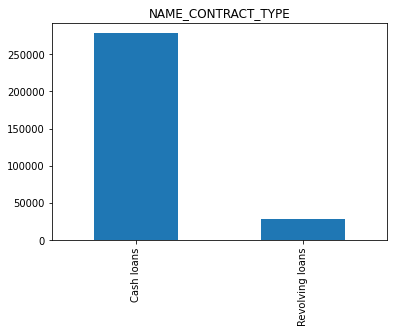

In [16]:
# fitur NAME_CONTRACT_TYPE
count = df['NAME_CONTRACT_TYPE'].value_counts()
percent = 100*df['NAME_CONTRACT_TYPE'].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title='NAME_CONTRACT_TYPE');

     jumlah sampel  persentase
F           202448        65.8
M           105059        34.2
XNA              4         0.0


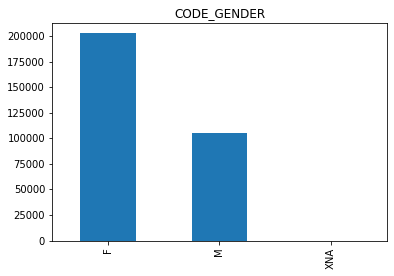

In [17]:
# fitur CODE_GENDER
count = df['CODE_GENDER'].value_counts()
percent = 100*df['CODE_GENDER'].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title='CODE_GENDER');

   jumlah sampel  persentase
N         202924        66.0
Y         104587        34.0


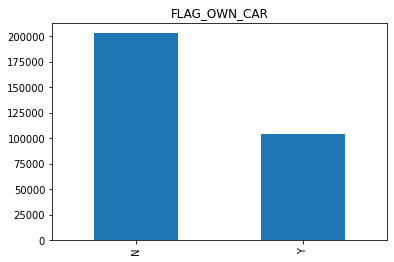

In [18]:
# fitur FLAG_OWN_CAR
count = df['FLAG_OWN_CAR'].value_counts()
percent = 100*df['FLAG_OWN_CAR'].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title='FLAG_OWN_CAR');

<h4> Analisis fitur numerik <h4>


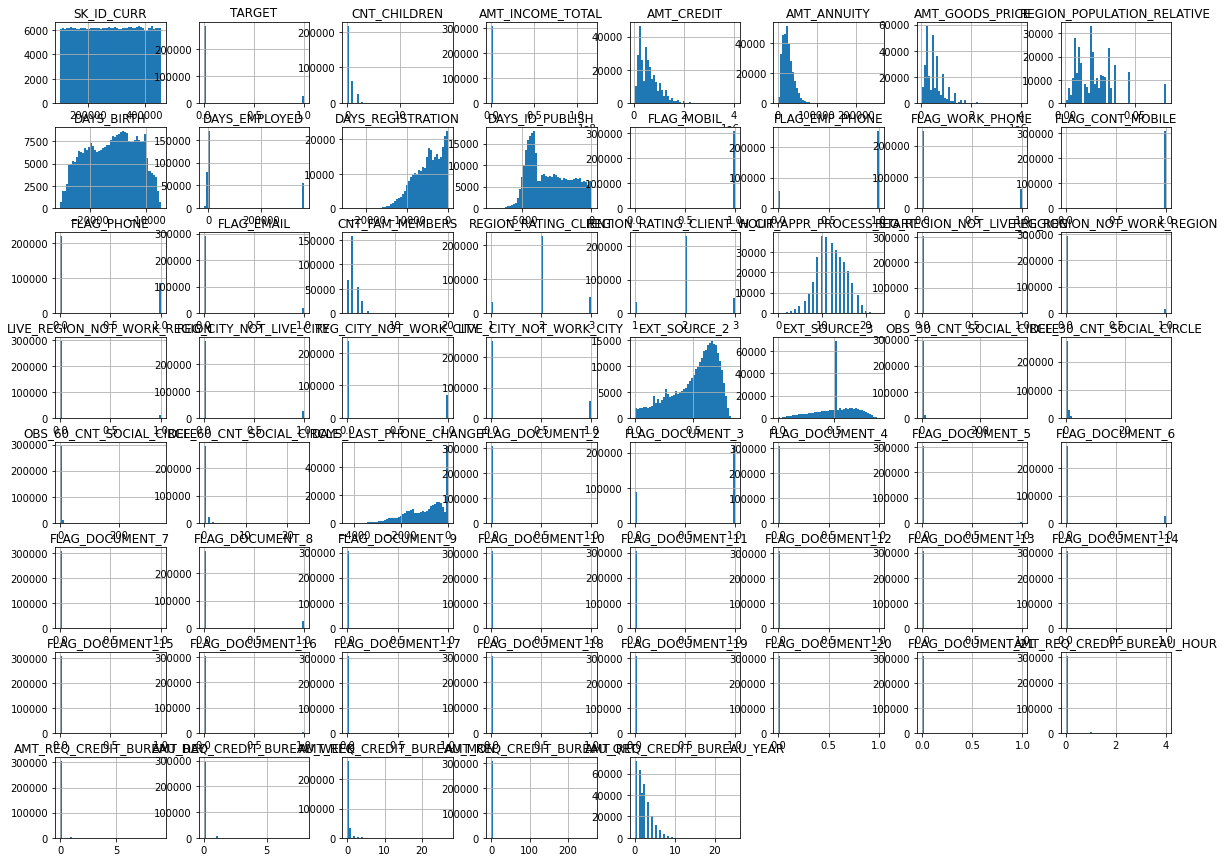

In [19]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<h2> Analisis Multivariate <h2>

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data.

<h4> Analisis fitur kategorik <h4>


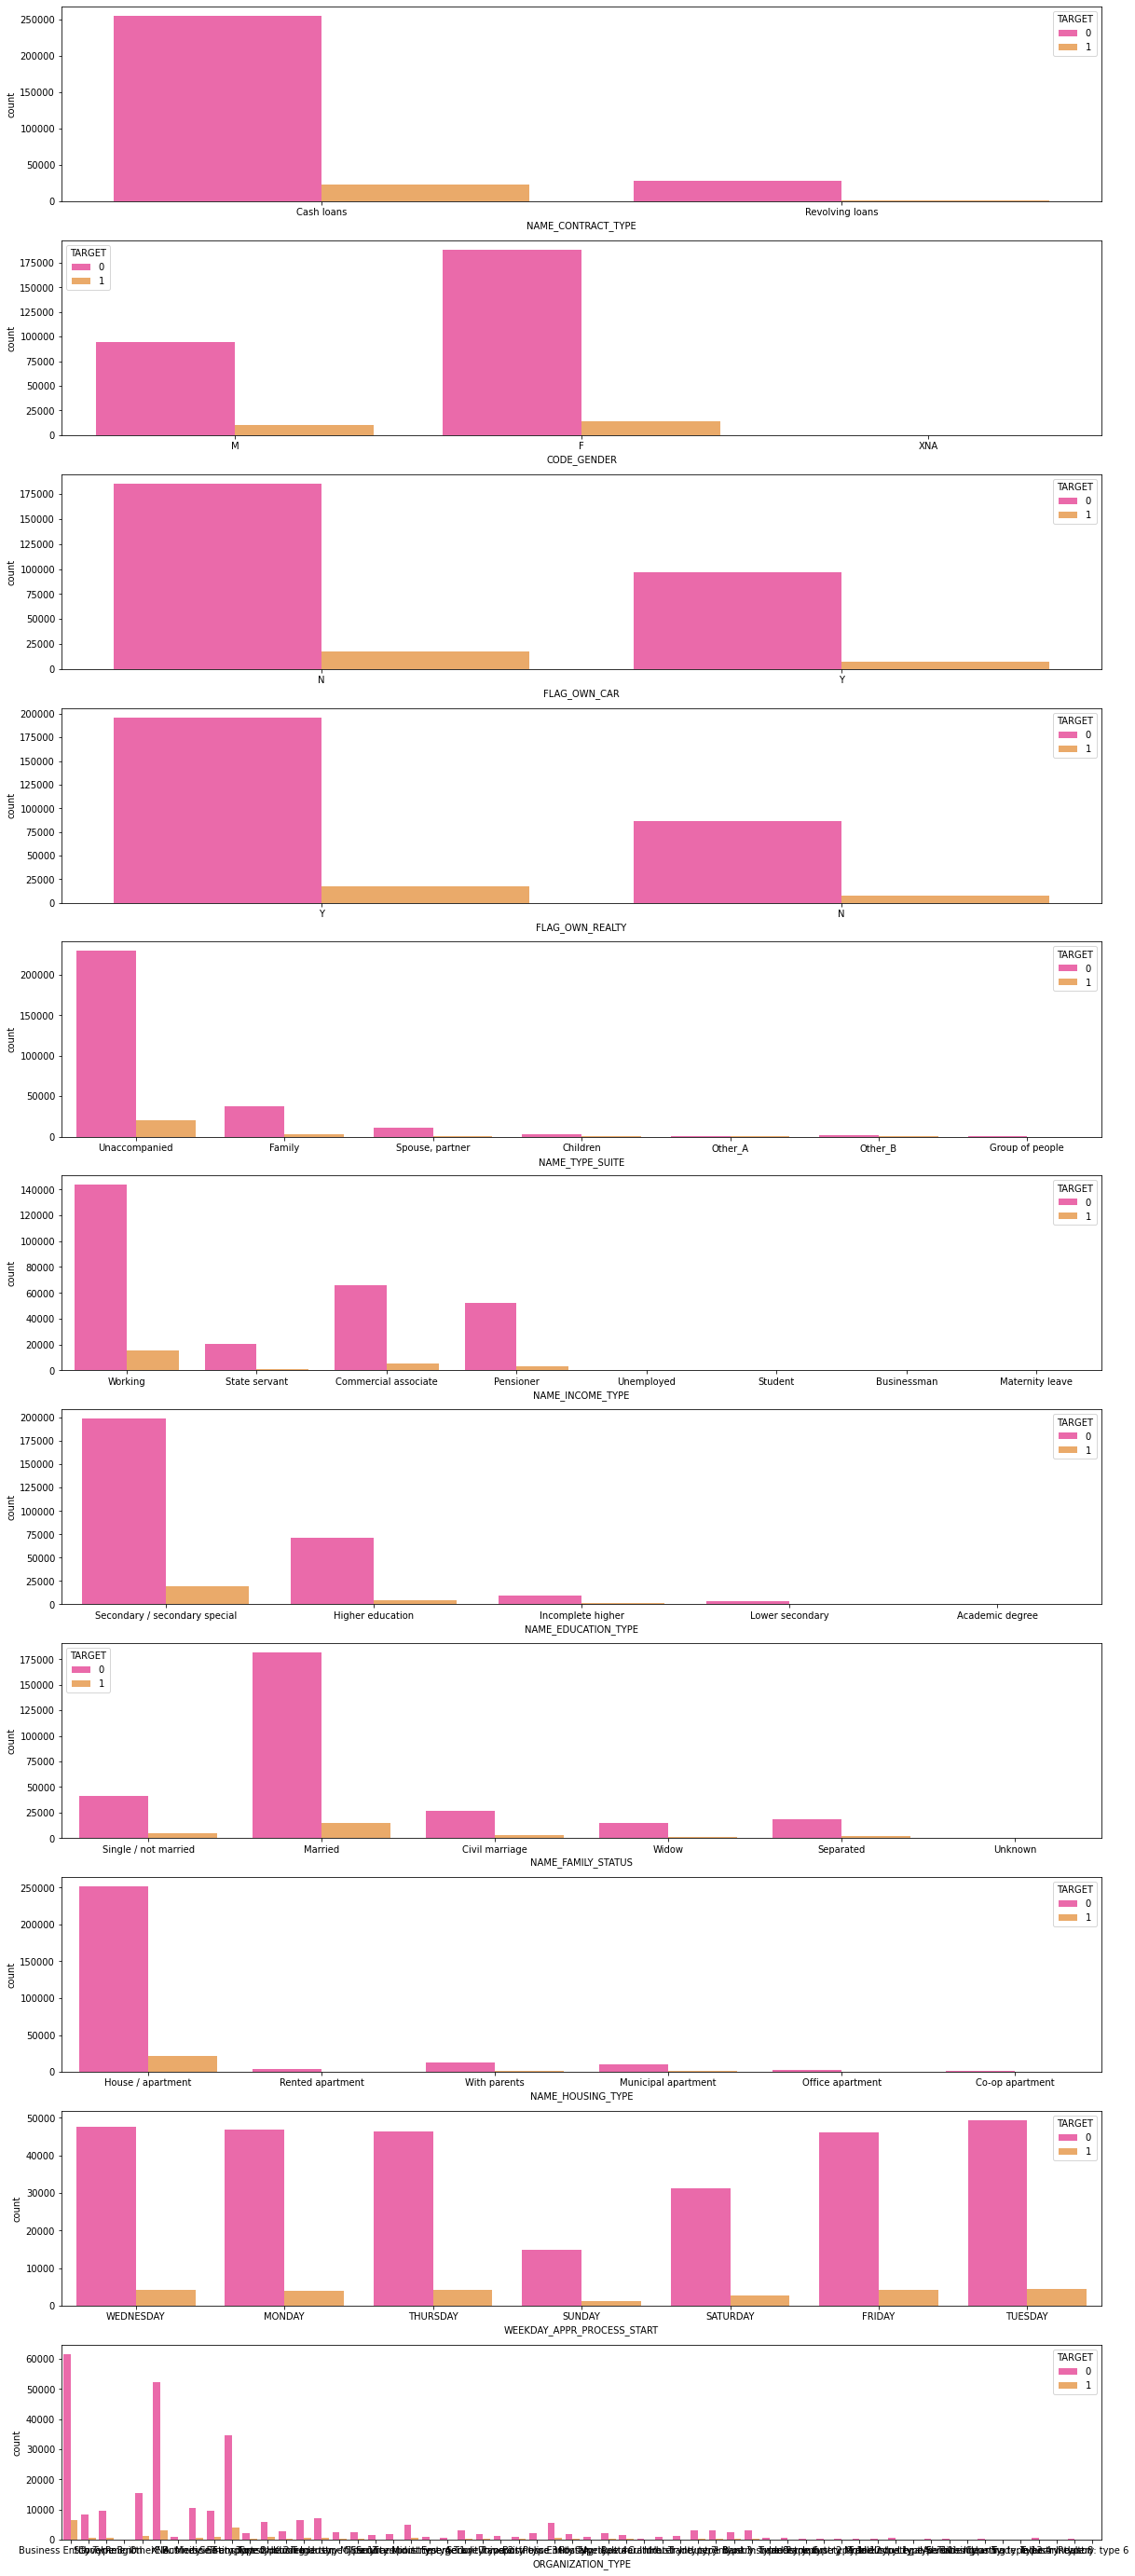

In [20]:
fig , axs = plt.subplots(ncols=1,nrows=11,figsize=(20,50))
index=0
axs = axs.flatten()
for cols in cat_dat:
        g = sns.countplot(x=cols,hue='TARGET',data=df,ax=axs[index],palette="spring")
        index +=1

<h4> Analisis fitur numerik <h4>

In [21]:
# Data Numerik
def numerical_features(df):
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    numerical_tbl = pd.DataFrame(df[numerical_cols].dtypes).rename(columns = {0:'Data Types'})
    print("The dataset contains {} numerical values.(included target value)".format(df[numerical_cols].shape[1]))
    
    return numerical_tbl

In [22]:
numerical_features(df)

The dataset contains 61 numerical values.(included target value)


,Data Types
SK_ID_CURR,int64
TARGET,int64
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


# Data Preparation

Melakukan data preparation dengan 3 tahapan yaitu :


1.   Encoding fitur kategorik
2.   Standarisasi
3.   Train-Test Split



<h2> Encoding Fitur Categorical

In [23]:
# Label Encoding untuk enkode data kategori yang memiliki 1 atau 2 kategori
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = df.select_dtypes(include=["object"])
l = LabelEncoder()
for p in categorical_cols:
    df[p]=l.fit_transform(df[p])
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.000000,0.000,0.000000,1.000000,0.000000,1.000000
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [24]:
# Hot Encoder untuk enkode data kategori yang memiliki lebih dari 2 kategori. 
# Menggunakan fungsi get_dummies untuk mengubah data kategori menjadi data dummy
df= pd.get_dummies(df)

print('Train data : ', df.shape)


Train data :  (307511, 72)


<h2> Standarisasi <h2>

Standarisasi menggunakan teknik StandarScaler dari library Scikitlearn, 

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

In [25]:
from sklearn.preprocessing import StandardScaler

# definisikan standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df)

<h2> Train-Test Split <h2>

proporsi pembagian data latih dan uji adalah 90:10

In [26]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["TARGET"],axis =1)
y = df["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [27]:
#cek jumlah sampel
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 307511
Total # of sample in train dataset: 276759
Total # of sample in test dataset: 30752


# Modelling

Modelling adalah tahapan di mana kita menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding.
Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

1.   Logistic Regression
2.   Decision Tree
3.   Random Forest


In [28]:
# Fungsi model
def predict(chosed_model,name="Model"):
    mdl = chosed_model
    mdl = mdl.fit(X_train,y_train)
    y_prob = mdl.predict_proba(X_test)[:,1]
    y_pred = mdl.predict(X_test)

    print("Performances with {}".format(name))
    auc_test = round(roc_auc_score(y_test,y_prob),2)
    print("AUC Performance: ", auc_test)
    accuracy_test = round(accuracy_score(y_test, y_pred),2)
    print("Accuracy Performance: ", accuracy_test)
    recall_test = round(recall_score(y_test, y_pred, average='weighted'),2)
    print("Recall Performance: ", recall_test)
    precision_test = round(precision_score(y_test, y_pred, average='weighted', zero_division=1),2)
    print("Precision Performance: ", precision_test)
    f1_score_test = round(f1_score(y_test, y_pred, average='weighted'),2)
    print("f1_score Performance: ", f1_score_test)

In [29]:
# Model Logistic Regression
predict((LogisticRegression(max_iter=200)),'LogisticRegression')

Performances with LogisticRegression
AUC Performance:  0.61
Accuracy Performance:  0.92
Recall Performance:  0.92
Precision Performance:  0.93
f1_score Performance:  0.88


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [30]:
# Model Decision Tree 
predict((DecisionTreeClassifier(criterion='gini')),'DecisionTreeClassifier')

Performances with DecisionTreeClassifier
AUC Performance:  0.54
Accuracy Performance:  0.85
Recall Performance:  0.85
Precision Performance:  0.86
f1_score Performance:  0.86


In [31]:
# Model Random Forest
predict((RandomForestClassifier(max_depth=4 , random_state=0)),'RandomForestClassifier')

Performances with RandomForestClassifier
AUC Performance:  0.72
Accuracy Performance:  0.92
Recall Performance:  0.92
Precision Performance:  0.93
f1_score Performance:  0.88
